In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('Titanic')
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
#percentage of missing values
train.isnull().mean()*100
#train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [95]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [110]:
train_missing_cols = train.columns[train.isnull().any()]
test_missing_cols = test.columns[test.isnull().any()]

In [132]:
columns = [i for i in train_missing_cols]
missingCount = [train[i].isnull().sum() for i in train_missing_cols]

In [133]:
missingCount

[177, 687, 2]

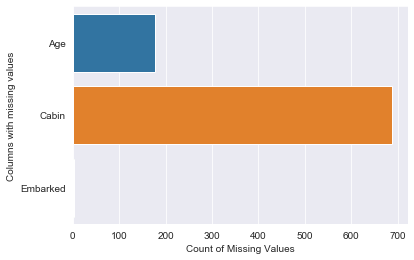

In [143]:
#plt.barh(columns, missingCount, color = 'purple', align='center')
sns.barplot(y=columns, x=missingCount, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns with missing values')
plt.show()

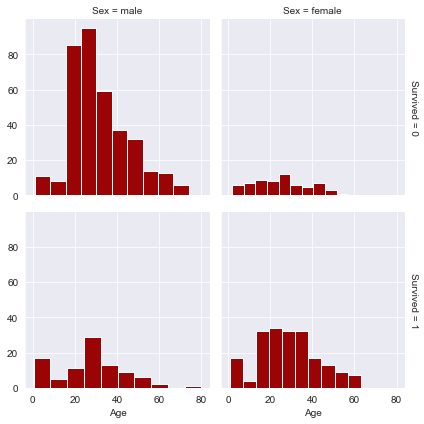

In [149]:
%matplotlib inline
sns.set_style("darkgrid")
plot = sns.FacetGrid(train, row='Survived', col='Sex', margin_titles=True)
plot.map(plt.hist, 'Age', color='#9b0404')

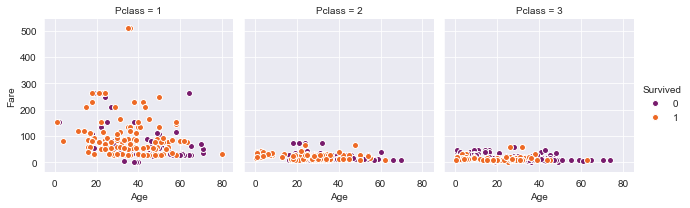

In [153]:
plot = sns.FacetGrid(train, col='Pclass', hue='Survived', palette='inferno')
plot.map(plt.scatter, 'Age', 'Fare',edgecolor="w" ).add_legend()

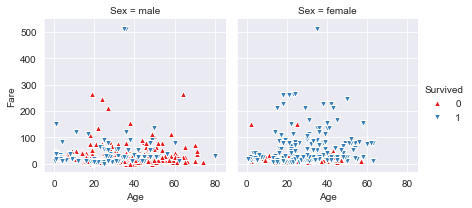

In [164]:
plot = sns.FacetGrid(train, col='Sex', hue='Survived', palette='Set1', hue_kws=dict(marker=["^", "v"]))
plot.map(plt.scatter, 'Age', 'Fare', edgecolor='w').add_legend()

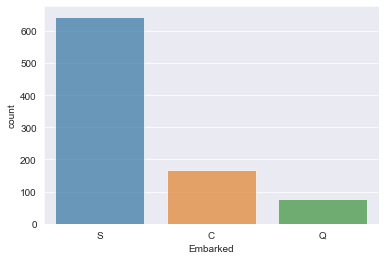

In [169]:
#train.Embarked.value_counts().plot(kind='bar')
sns.countplot(x='Embarked', data=train, alpha=0.7)

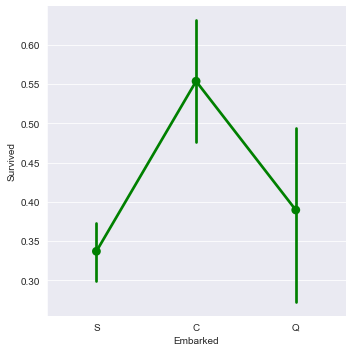

In [171]:
sns.factorplot(x='Embarked', y='Survived', data = train, color='g')

Text(0.5, 0.98, 'Men, Women Survived in each class')

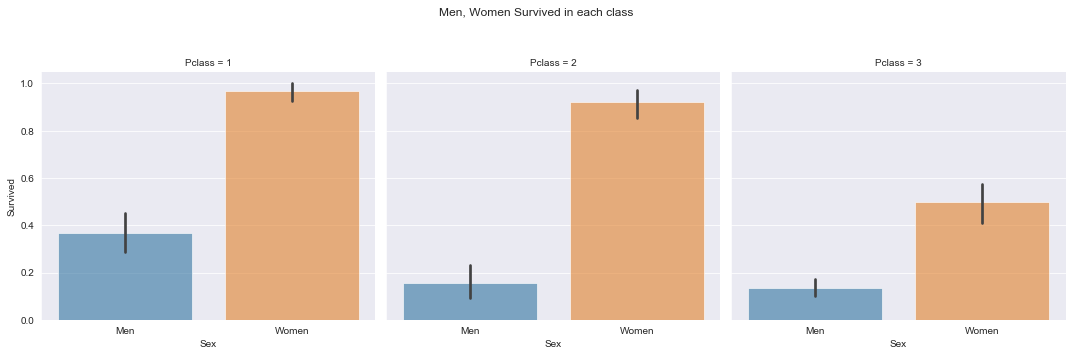

In [197]:
plot = sns.factorplot(x='Sex', y='Survived', col='Pclass', kind='bar', data=train, alpha=0.6)
plot.set_xticklabels(['Men', 'Women'])
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Men, Women Survived in each class')

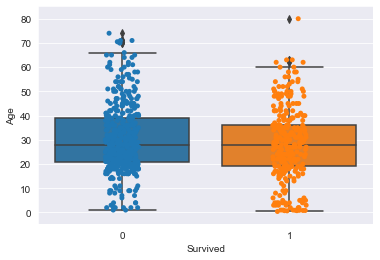

In [198]:
sns.boxplot(x='Survived', y='Age', data=train)
sns.stripplot(x='Survived', y='Age', data=train)

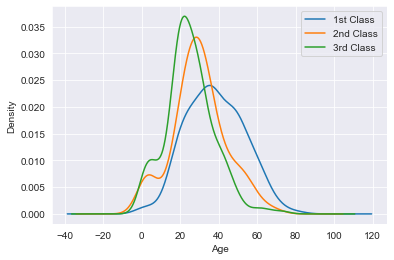

In [207]:
train.Age[train['Pclass']==1].plot(kind='kde')
train.Age[train.Pclass==2].plot(kind='kde')
train.Age[train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

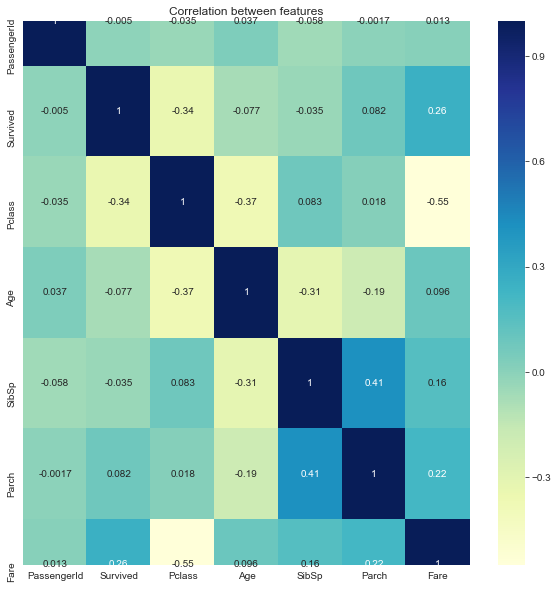

In [218]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linecolor="magenta")
plt.title('Correlation between features');

In [220]:
corr['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

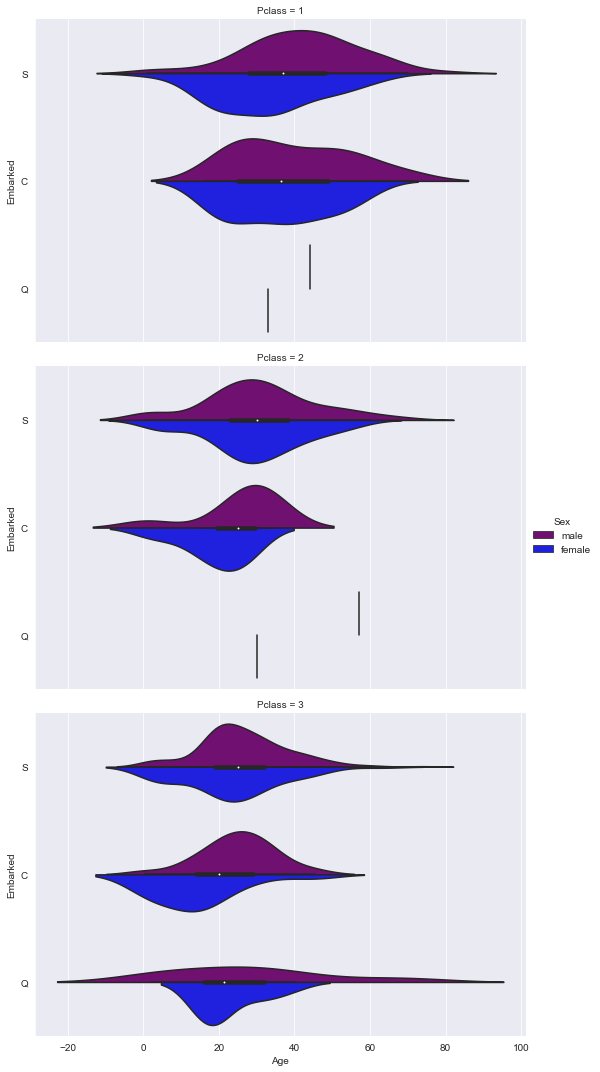

In [244]:
sns.factorplot(x="Age", y="Embarked", hue="Sex", row="Pclass",
                    data=train[train.Embarked.notnull()],palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, aspect=1.5);

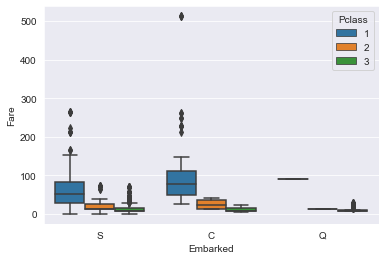

In [261]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train)

In [262]:
train['Embarked'] = train.Embarked.fillna(value='C')

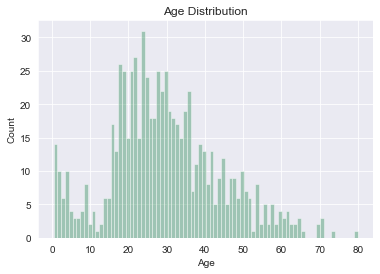

In [277]:
sns.distplot(train.Age.dropna(), bins=80, kde=False, color='Seagreen')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [318]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [320]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [328]:
#filling the missing fare value with median fare of Pclass 3, Embarked S value

median_fare = test[(test.Embarked=='S')&(test.Pclass==3)]['Fare'].median()
test.Fare = test.Fare.fillna(value=median_fare)

In [339]:
test['Deck']=test.Cabin.str[0]
train['Deck']=train.Cabin.str[0]
train.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


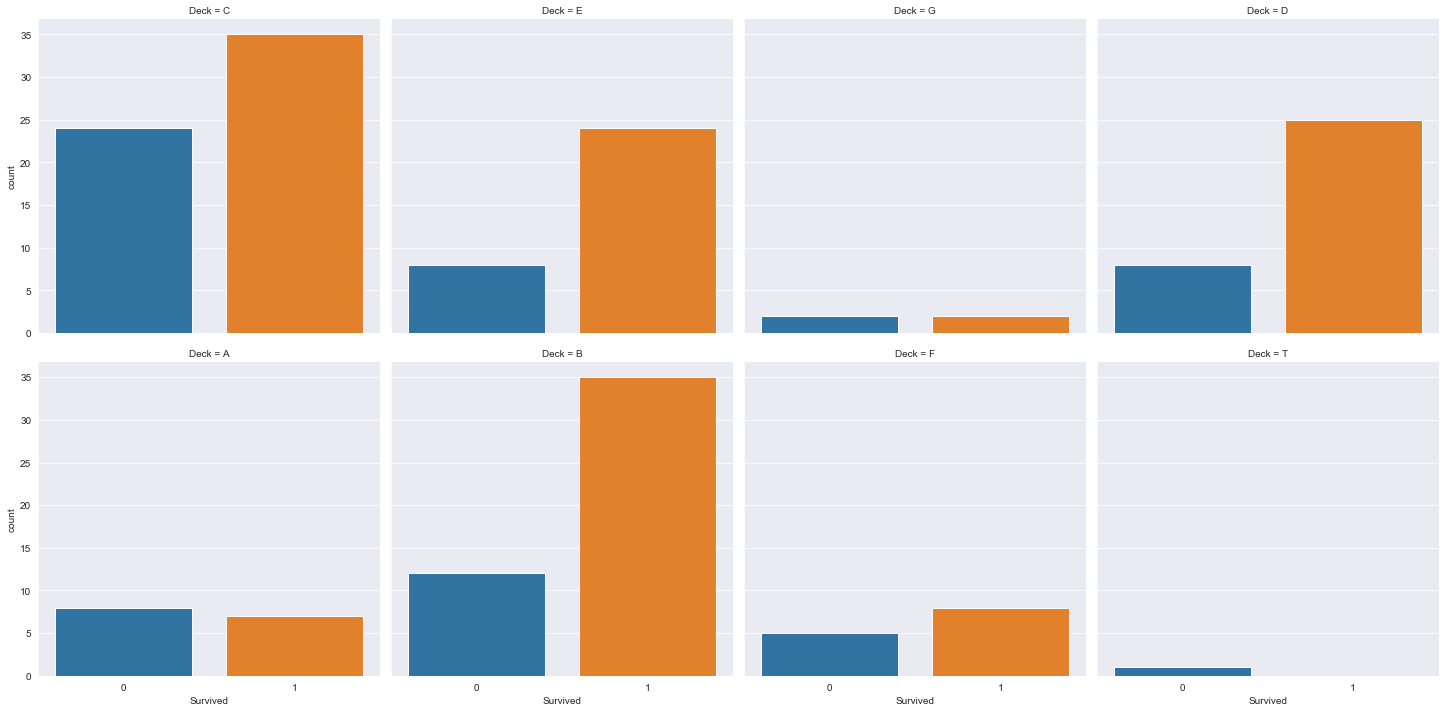

In [343]:
sns.factorplot('Survived', col='Deck', data=train[train.Deck.notnull()], kind='count', col_wrap=4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


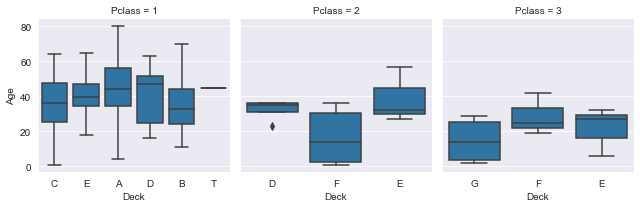

In [354]:
plot = sns.FacetGrid(train, col='Pclass', sharex=False)
plot.map(sns.boxplot, 'Deck', 'Age')

In [457]:
#filling the NaN values in Deck column with 'Z'
train.Deck.fillna('Z', inplace=True)
test.Deck.fillna('Z', inplace=True)


In [391]:
train.Deck.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [388]:
train = train.sort_values(by='Deck')

In [392]:
#No of passengers from the same family travelled
def familysize(df):
    df['FamilySize'] = df['SibSp'] + df['Parch']+1

familysize(train)
familysize(test)
print(train.FamilySize.value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [393]:
def FamilyClass(df):
    df.loc[df.FamilySize==1, 'Fclass'] = 'single'
    df.loc[(df.FamilySize>1)&(df.FamilySize<5),'Fclass'] = 'small'
    df.loc[(df.FamilySize>4),'Fclass'] = 'large'

FamilyClass(train)
FamilyClass(test)

In [395]:
train.Fclass.value_counts()

single    537
small     292
large      62
Name: Fclass, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


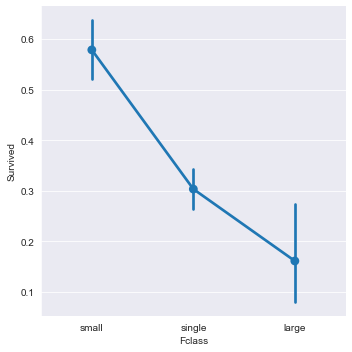

In [394]:
sns.factorplot(x='Fclass',y='Survived', data=train)

[good, short, okay, looong]
Categories (4, object): [short < good < okay < looong]


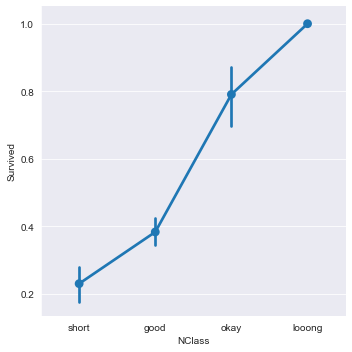

In [401]:
def NameLen(df, bins=[0,20,40,57,85], group_name=['short', 'good', 'okay', 'looong']):
    df['NLength'] = df['Name'].apply(lambda x: len(x))
    df['NClass'] = pd.cut(df.NLength, bins, labels=group_name)

NameLen(train)
NameLen(test)

sns.factorplot(x='NClass', y='Survived', data=train)
print(train.NClass.unique())

In [421]:
import re
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search('([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)

#Get all the titles and print how often each one occurs.
titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Mme           1
Ms            1
Lady          1
Sir           1
Countess      1
Don           1
Name: Name, dtype: int64


In [419]:
train['Title'] = titles

In [428]:
train.loc[train.Title.isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), 'Title'] = 'Rare Title'

In [431]:
#train.query("Title in ['Miss', 'Col']")
titlemap={'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
for key, value in titlemap.items():
    train.loc[train["Title"] == key, "Title"] = value

In [440]:
test['Title'] = test["Name"].apply(get_title)

In [441]:
test.loc[test.Title.isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), 'Title'] = 'Rare Title'
titlemap={'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
for key, value in titlemap.items():
    test.loc[test["Title"] == key, "Title"] = value

In [442]:
test.Title.value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

In [459]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
col_names = ['Embarked','Sex',"Title", 'Fclass','NClass','Deck']

for i in col_names:
    train[i] = labelEnc.fit_transform(train[i])
    test[i] = labelEnc.fit_transform(test[i])

In [461]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Deck           891 non-null int64
FamilySize     891 non-null int64
Fclass         891 non-null int64
NLength        891 non-null int64
NClass         891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(13), object(3)
memory usage: 172.3+ KB


In [462]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Title','Pclass','FamilySize',
                 'Fclass','NLength',"NClass",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1:]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1:])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [473]:
titanic=fill_missing_age(train)
titanic_test=fill_missing_age(test)

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required.

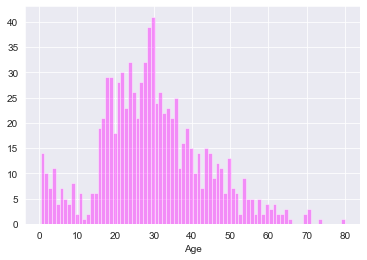

In [476]:
sns.distplot(titanic["Age"],bins=80,kde=False,color="magenta")

In [475]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 445 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Deck           891 non-null int64
FamilySize     891 non-null int64
Fclass         891 non-null int64
NLength        891 non-null int64
NClass         891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(13), object(3)
memory usage: 172.3+ KB


In [477]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = scaler.transform(titanic[['Age', 'Fare']])

scaler = StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = scaler.transform(titanic_test[['Age', 'Fare']])

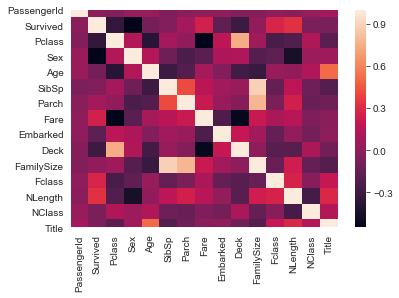

In [482]:
sns.heatmap(titanic.corr())

In [484]:
titanic.corr()['Survived'].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.084727
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.174199
Deck          -0.301116
FamilySize     0.016639
Fclass         0.283810
NLength        0.332350
NClass        -0.067477
Title         -0.071174
Name: Survived, dtype: float64>

<h1>Predictions</h1>

<h2>Linear Regression Model </h2>

In [599]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch',
            'Fare','Embarked','Deck','Fclass','NLength','Title']

label = 'Survived'
predictions=[]

train_df = pd.concat([X,y], axis=1)

train_df = train_df.reset_index(drop=True)

In [600]:
X = train_df[['Pclass','Sex','Age','SibSp','Parch',
            'Fare','Embarked','Deck','FamilySize','NLength','Title']]

y=train_df['Survived']

In [601]:
kf = KFold(n_splits=10, random_state=42, shuffle=False)
clf = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    y_pred = clf.predict(X_test)
    predictions.append(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [602]:
predicted = np.concatenate(predictions, axis=0)

predicted[predicted>0.5] = 1
predicted[predicted<=0.5] = 0

accuracy = (titanic.Survived == predicted).mean()
accuracy

<h2>Logistic Regression Model </h2>

In [752]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

features = ["Pclass", "Sex", "Fare", "Embarked","Deck","Age", "Fclass", "NLength","Title", 'Embarked']
lr = LogisticRegression(random_state=44)
cv = ShuffleSplit(n_splits=5, test_size=.30, random_state=44)

score = cross_val_score(lr, titanic[features], titanic['Survived'], scoring='f1', cv = cv)

score.mean()

0.726976055811188

<h2>Random Forest</h2>

In [625]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=44, oob_score=True)

clf.fit(titanic[features], titanic['Survived'])

clf.score(titanic[features], titanic['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9685746352413019

In [754]:
predictors = ["Pclass", "Sex", "Age","Fare","NLength","NClass", "Fclass", "Title","Deck", 'Embarked']
clf = RandomForestClassifier(random_state=10, n_estimators=10)
clf.fit(titanic[predictors],titanic["Survived"])

kf = KFold(n_splits=10)

scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='f1', cv=kf)

print(scores.mean())

0.7267293618277584


<h1> Feature Selection</h1>

In [755]:
clf.feature_importances_

array([0.07807593, 0.18130743, 0.18695097, 0.16277591, 0.16105364,
       0.02252022, 0.0414692 , 0.08437583, 0.0512612 , 0.03020968])

In [756]:
important_features = pd.Series(data=clf.feature_importances_,index=titanic[predictors].columns)
important_features.sort_values(ascending=False,inplace=True)

In [757]:
predictors

['Pclass',
 'Sex',
 'Age',
 'Fare',
 'NLength',
 'NClass',
 'Fclass',
 'Title',
 'Deck',
 'Embarked']

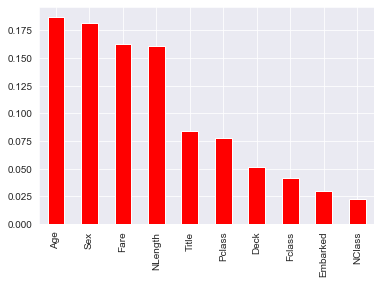

In [758]:
important_features.plot(kind='bar', color='r')

In [759]:
#Compute the ANOVA F-value for the provided sample.
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif, k=5)
select.fit(titanic[predictors], titanic['Survived'])
scores = select.pvalues_
scores

array([2.53704739e-25, 1.40606613e-69, 1.14038203e-02, 6.12018934e-15,
       2.02679507e-24, 4.40486065e-02, 5.72309805e-18, 3.36505348e-02,
       3.93929508e-20, 1.67197343e-07])

In [760]:
log_scores = -np.log10(scores)
indexes = np.argsort(log_scores)[::-1]

In [761]:
xticks = [predictors[i] for i in indexes]

In [762]:
log_scores[indexes]

array([68.85199425, 24.59567142, 23.69319016, 19.40458149, 17.24236881,
       14.21323514,  6.77677063,  1.94294963,  1.47300803,  1.35606783])

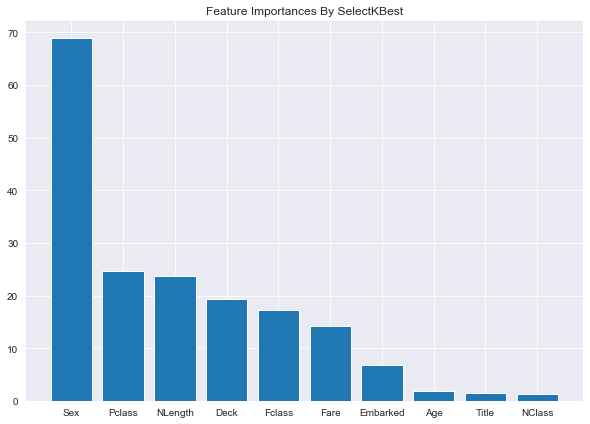

In [767]:
plt.figure(figsize=(10,7))
plt.bar(range(np.size(predictors)), log_scores[indexes])
plt.xticks(range(np.size(predictors)), xticks)
plt.title("Feature Importances By SelectKBest")
plt.show()

In [778]:
#Training a linear regression model based on the SelectKBest output
from sklearn.linear_model import LogisticRegression
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NLength",
              "Fclass","Deck"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(lr, titanic[predictors], titanic["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.7433076198339332


<h2>AdaBoost</h2>

In [791]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
cv = ShuffleSplit(test_size=0.3, random_state=44)
score = cross_val_score(adb, titanic[predictors], titanic['Survived'], scoring='f1', cv=cv)
score.mean()

0.742700398663018

In [793]:
from sklearn.ensemble import VotingClassifier

predictions=["Pclass", "Sex", "Age", "Fare", "Embarked","NClass",
              "Fclass", "Title","Deck","NLength"]

vclf = VotingClassifier(estimators=[('linear',lr),('Rf',clf),('AdaBoost',adb)])

vclf.fit(titanic[predictions], titanic['Survived'])
vclf

VotingClassifier(estimators=[('linear',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('Rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                            

In [796]:
test_predictions=vclf.predict(titanic_test[predictions])
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [797]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)

<h2>Submission score on Kaggle : 0.7703</h2>
<h3>Its an improvement from my last submission score 0.75598 .</h3>
<h3>Advanced 3098 positions from my previous position</h3>